# Preprocessing of the dataset (Brain)

## loading the data

In [ ]:
import os
import cv2
from tqdm import tqdm
import numpy as np
def load_data(dirct):
    X = []
    y = []
    i = 0
    labels = dict()
    
    paths = []
    for path in os.listdir(dirct): #This would print all the files and directories
        if not path.startswith('.'):
           paths.append(path)
        
    for path in tqdm(sorted(paths)): 
        labels[i] = path
        for file in os.listdir(dirct + path):
            if not file.startswith('.'):
                #image = cv2.imread(dirct + path + '/' + file)
                img = cv2.imread(dirct + path + '/' + file)
                X.append(img)
                y.append(i)
        i += 1
    X = np.array(X,dtype=object)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dirct} directory.')
    return X, y, labels               

In [70]:
TRAIN_DIR = 'dataset/train/'
TEST_DIR = 'dataset/test/'
VAL_DIR = 'dataset/val/'
#IMG_SIZE = (224,224)

In [90]:
X_train,Y_train,labels = load_data(TRAIN_DIR)

100%|██████████| 4/4 [00:14<00:00,  3.66s/it]

2210 images loaded from dataset/train/ directory.


In [84]:
X_test,Y_test,_ = load_data(TEST_DIR)

100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

560 images loaded from dataset/test/ directory.


In [57]:
X_val,Y_val,_ = load_data(VAL_DIR)

100%|██████████| 4/4 [00:06<00:00,  1.59s/it]

820 images loaded from dataset/val/ directory.


## Cropping the images

In [75]:
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

def crop_imgs(set_name):
    
    new_set = []
    for img in set_name:
        #img_path ='gg.jpg'
        #image = cv.imread(img_path)#load the image
        origin_img = img.copy()
        conv_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)#convert the image to gray image
        threshold = cv.threshold(conv_img, 45,255,cv.THRESH_BINARY)[1]#separate an object from the background in the image
        contours = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]#find the contours
        # find the biggest countour (c) by the area
        C = max(contours, key=cv.contourArea)
        img_cont = cv.drawContours(img, [C], 0, (226,185,89), 3)#drawing the contours

        #find the extreme points
        tuple(C[C[:,:,0].argmin()][0])
        C[:,:,0] #return all the lines and the first column
        C[:,:,0].argmin()#return the indice of the min val

        XLeft_point = tuple(C[C[:,:,0].argmin()][0])
        XRight_point = tuple(C[C[:,:,0].argmax()][0])
        YTop_point = tuple(C[C[:,:,1].argmin()][0])
        YBot_point = tuple(C[C[:,:,1].argmax()][0])

        img_point = cv.circle(img.copy(), XLeft_point, 8, (0,0,255), -1)
        img_point = cv.circle(img_point, XRight_point, 8, (0,255,0), -1)
        img_point = cv.circle(img_point, YTop_point, 8, (255,0,255), -1)
        img_point = cv.circle(img_point, YBot_point, 8, (255,255,255), -1)

        new_img = img[YTop_point[1]:YBot_point[1],XLeft_point[0]:XRight_point[0]]
        
        plt.figure(figsize=(15,6))
        plt.subplot(141)
        plt.imshow(origin_img)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step1: Get the original image')
        plt.subplot(142)
        plt.imshow(img_cont)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step1: Find the biggest contour')
        plt.subplot(143)
        plt.imshow(img_point)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step1: Find the extreme points')
        plt.subplot(144)
        plt.imshow(new_img)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step1: Crop the image')
        plt.show()
        new_img = array_to_img(new_img)
        new_img = new_img.resize((224, 224))
        new_img = img_to_array(new_img)
        new_set.append(new_img)
    return np.array(new_set,dtype=object)



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


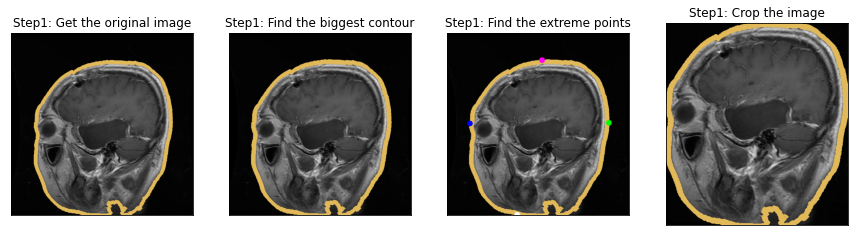

In [81]:
train_crop = crop_imgs(X_train[:1])

In [110]:
#train_crop = crop_imgs(X_train)
#test_crop = crop_imgs(X_test)
#val_crop = crop_imgs(X_val)

## Data visualisation

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
def afficher(set_name,n):
    fig = plt.figure(figsize=(9, 13)) 
    columns = n
    rows = n
    ax = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
    for i in range(columns*rows): 
        ax.append( fig.add_subplot(rows, columns, i+1) )
        
        #ax[i].set_title("image"+ax[i]) 
        # set title 
        plt.imshow(set_name[i]) 
    
    plt.show()


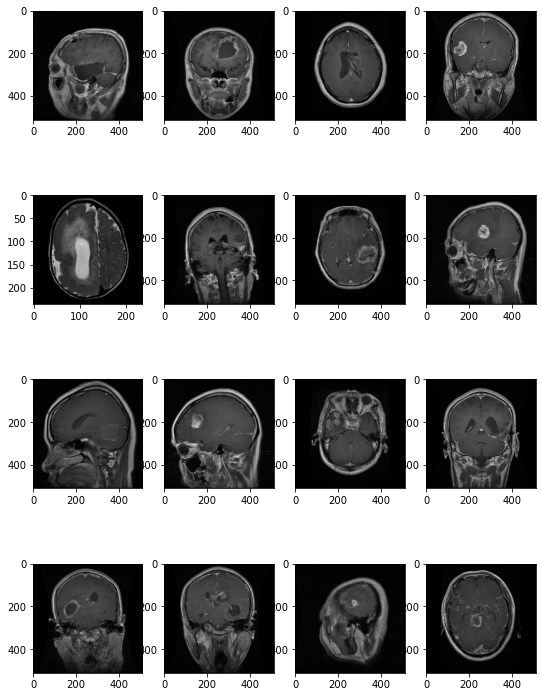

In [97]:
afficher(X_train,4)

## Save the new images in a new directory

In [51]:
def save_img(set_name,y,nom):
    name = ''
    if nom == 'X_train':
        name = 'train_crop'
    elif nom == 'X_test':
        name = 'test_crop'
    else:
        name = 'val_crop'
    for i in range(len(set_name)):
        if y[i] == 0:
            cv2.imwrite('dataset/'+name+'/glioma_tumor/glioma'+str(i)+'.jpg',img_to_array(set_name[i]))
        elif y[i] == 1:
            cv2.imwrite('dataset/'+name+'/meningioma_tumor/meningioma'+str(i)+'.jpg',img_to_array(set_name[i]))
        elif y[i] == 2:
            cv2.imwrite('dataset/'+name+'/no_tumor/no'+str(i)+'.jpg',img_to_array(set_name[i]))
        else:
            cv2.imwrite('dataset/'+name+'/pituitary_tumor/pituitary'+str(i)+'.jpg',img_to_array(set_name[i])) 
            

In [52]:
#save_img(train_crop,Y_train,'X_train')

In [55]:
#save_img(test_crop,Y_test,'X_test')

In [59]:
#save_img(val_crop,Y_val,'X_val')

## Data augmentation

In [114]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import os
def augmentation(direct,D):
    datagen = ImageDataGenerator(rotation_range=40,
                             shear_range=0.2,
                             #zoom_range=0.2,
                             #horizontal_flip=True,
                             brightness_range=(0.5,1.5))
    paths = sorted(os.listdir(direct))
    L = list(D.keys())
    j = 0
    for path in paths:
        if not path.startswith('.'):
            k = D[L[j]]
            T = os.listdir(direct+path)
            T = T[ int(len(T)/2) : (int(len(T)/2)+k) ]
            for m in range(len(T)):
                img = load_img(direct+path+'/'+T[m])
                X = img_to_array(img)
                X = X.reshape((1,)+X.shape)
                i = 0
                for b in datagen.flow(X,batch_size = 1,
                                         save_to_dir=direct+path,
                                         save_prefix='brain',save_format='jpeg'):
                    i += 1
                    if i > 0:
                        break   
            j += 1  
            

In [8]:
#Augmentation
TRAIN_DIR_crop = 'dataset/train_crop/'
TEST_DIR_crop = 'dataset/test_crop/'
VAL_DIR_crop = 'dataset/val_crop/'

In [65]:
#Augmenter train crop
"""Besion_train = {'glioma_tumor':11,
                 'meningioma_tumor':4,
                 'no_tumor':382,
                 'pituitary_tumor':29}
augmentation(TRAIN_DIR_crop,Besion_train)"""

In [67]:
#Augmenter val crop
"""Besion_val = {'glioma_tumor':32,
                 'meningioma_tumor':34,
                 'no_tumor':0,
                 'pituitary_tumor':30}
augmentation(VAL_DIR_crop,Besion_val)"""

In [4]:
X_train_crop,Y_train,_ = load_data(TRAIN_DIR_crop)

100%|██████████| 4/4 [00:08<00:00,  2.21s/it]


2636 images loaded from dataset/train_crop/ directory.


In [7]:
X_test,Y_test,_ = load_data(TEST_DIR_crop)

100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


560 images loaded from dataset/test_crop/ directory.


In [43]:
X_val,Y_val,_ = load_data(VAL_DIR_crop)

100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


916 images loaded from dataset/val_crop/ directory.


## Data normalisation

In [6]:
#Normalisation
X_train_crop = X_train_crop/255

In [9]:
#Normalisation
X_test = X_test/255

In [12]:
#Normalisation
X_val = X_val/255

In [13]:
from keras.applications.vgg16 import VGG16,preprocess_input
from keras import layers
from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Lambda,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout

 # Build the VGG-16 model

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(4,activation='softmax'))
model.layers[0].trainable=False
model.compile(optimizer= 'adam', metrics= ['accuracy'], loss='categorical_crossentropy')


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [99]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

train_datagen = ImageDataGenerator(rotation_range=15, # rotation
                                 width_shift_range=0.1,# horizontal shift
                                 height_shift_range=0.1,# vertical shift
                                 brightness_range=[0.5,1.5],# brightness
                                 horizontal_flip=True,# horizontal flip
                                 vertical_flip=True,# vertical flip
                                 preprocessing_function=preprocess_input)
#preprocessing_function : function that will be applied on each input.
#The function will run after the image is resized and augmented.
#The function should take one argument: one image (Numpy tensor with rank 3),
#and should output a Numpy tensor with the same shape.
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_val = ImageDataGenerator(preprocessing_function=preprocess_input)


In [100]:
RANDOM_SEED = 123
TRAIN_DIR_crop = 'dataset/train_crop/'
TEST_DIR_crop = 'dataset/test_crop/'
VAL_DIR_crop = 'dataset/val_crop/'
train_generator = train_datagen.flow_from_directory(TRAIN_DIR_crop,
                                                   color_mode='rgb',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   seed=RANDOM_SEED)
validation_generator = test_datagen.flow_from_directory(TEST_DIR_crop,
                                                       color_mode='rgb',
                                                       target_size=(224,224),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       seed=RANDOM_SEED)
validation_generator_val = test_datagen.flow_from_directory(VAL_DIR_crop,
                                                       color_mode='rgb',
                                                       target_size=(224,224),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       seed=RANDOM_SEED)

Found 2636 images belonging to 4 classes.
Found 560 images belonging to 4 classes.
Found 916 images belonging to 4 classes.


In [20]:
from keras.callbacks import EarlyStopping
EPOCHS = 20
es = EarlyStopping(monitor='val_acc',
                  mode='max',
                  patience=6)
hist = model.fit_generator(train_generator,
                          steps_per_epoch=20,
                          epochs=EPOCHS,
                          validation_data=validation_generator,
                          validation_steps=25,
                          callbacks=[es])


<ipython-input-20-7b4db54de639>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/20
20/20 [==============================] - 336s 17s/step - loss: 11.7244 - accuracy: 0.4750 - val_loss: 9.3194 - val_accuracy: 0.6325
Epoch 2/20
20/20 [==============================] - 294s 15s/step - loss: 8.8538 - accuracy: 0.6469 - val_loss: 10.2659 - val_accuracy: 0.6575
Epoch 3/20
20/20 [==============================] - 284s 14s/step - loss: 10.0902 - accuracy: 0.6581 - val_loss: 5.8771 - val_accuracy: 0.7475
Epoch 4/20
20/20 [==============================] - 286s 15s/step - loss: 7.4434 - accuracy: 0.7219 - val_loss: 5.0429 - val_accuracy: 0.7550
Epoch 5/20
20/20 [==============================] - 288s 15s/step - loss: 8.0147 - accuracy: 0.6719 - val_loss: 7.5221 - val_accuracy: 0.7025
Epoch 6/20
20/20 [==============================] - 282s 14s/step - loss: 7.8627 - accuracy: 0.7048 - val_loss: 6.5543 - val_accuracy: 0.7575
Epoch 7/20
20/20 [==============================] - 286s 15s/step - loss: 8.1453 - accuracy: 0.7344 - val_loss: 9.7732 - val_accuracy: 0.6950
Epo

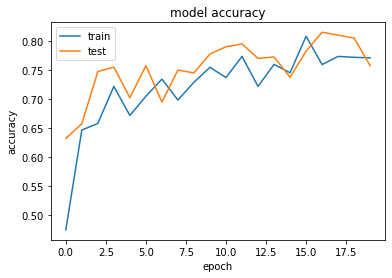

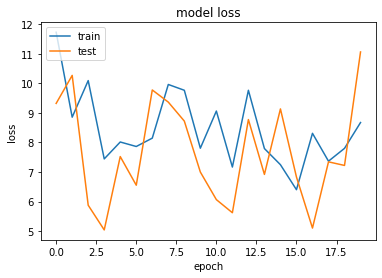

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## The final accuracy

In [101]:
from tensorflow.keras.models import load_model

VGG16 = load_model('vgg_pfe2.h5')
loss, acc = VGG16.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

35/35 - 157s - loss: 10.5055 - accuracy: 0.7696 - 157s/epoch - 4s/step
Restored model, accuracy: 76.96%


## Save the vgg16 model

In [22]:
model.save('vgg_pfe2.h5')

 # Build the RseNet-50 Model
 


In [50]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation='sigmoid'))
model.layers[0].trainable=False
model.compile(optimizer= 'adam', metrics= ['accuracy'], loss='categorical_crossentropy')


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 401412    
                                                                 
Total params: 23,989,124
Trainable params: 401,412
Non-trainable params: 23,587,712
_________________________________________________________________


In [62]:
from keras.callbacks import EarlyStopping
EPOCHS = 15
es = EarlyStopping(monitor='val_acc',
                  mode='max',
                  patience=6)
hist = model.fit_generator(train_generator,
                          steps_per_epoch=20,
                          epochs=EPOCHS,
                          validation_data=validation_generator_val,
                          validation_steps=25,
                          callbacks=[es])



<ipython-input-62-f24c881f818d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/15
20/20 [==============================] - 121s 6s/step - loss: 3.5043 - accuracy: 0.8203 - val_loss: 3.8752 - val_accuracy: 0.7825
Epoch 2/15
20/20 [==============================] - 120s 6s/step - loss: 3.9775 - accuracy: 0.7969 - val_loss: 4.3886 - val_accuracy: 0.7950
Epoch 3/15
20/20 [==============================] - 117s 6s/step - loss: 3.9160 - accuracy: 0.7953 - val_loss: 4.6924 - val_accuracy: 0.7600
Epoch 4/15
20/20 [==============================] - 118s 6s/step - loss: 4.3112 - accuracy: 0.7719 - val_loss: 3.9125 - val_accuracy: 0.7950
Epoch 5/15
20/20 [==============================] - 117s 6s/step - loss: 4.3756 - accuracy: 0.8031 - val_loss: 4.0104 - val_accuracy: 0.7950
Epoch 6/15
20/20 [==============================] - 118s 6s/step - loss: 3.5139 - accuracy: 0.8266 - val_loss: 3.4679 - val_accuracy: 0.8125
Epoch 7/15
20/20 [==============================] - 117s 6s/step - loss: 2.9222 - accuracy: 0.8516 - val_loss: 3.1957 - val_accuracy: 0.8300
Epoch 8/15
20

## The final accuracy

In [63]:
loss, acc = model.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

35/35 - 61s - loss: 5.2407 - accuracy: 0.8232 - 61s/epoch - 2s/step
Restored model, accuracy: 82.32%


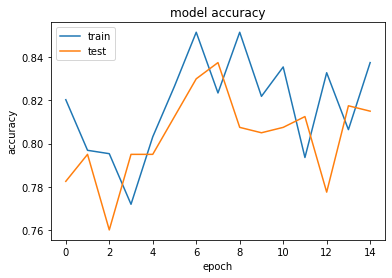

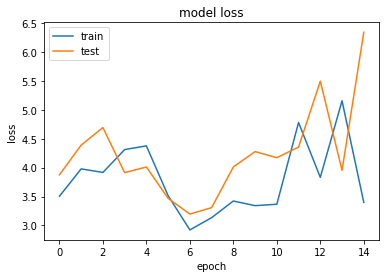

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the ResNet50 model

In [65]:
model.save('ResNet50_pfe.h5')

# Testing the brain tumor model and object detection model

In [1]:
Tumors = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

In [2]:
Objects = {0: 'brain', 1: 'cats', 2: 'dogs', 3: 'panda'}

In [3]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

import numpy as np
Obj_Det_model = load_model('object_detection.h5')
ResNet_model = load_model('ResNet50_pfe.h5')

In [10]:
img = load_img('cora.jpeg')
img = img.resize((224, 224))
img = img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)

In [11]:
Obj_pred = Obj_Det_model.predict(img)
pred = np.argmax(Obj_pred)
if pred == 0:
    Tumor_pred = ResNet_model.predict(img)
    Bra_pred = np.argmax(Tumor_pred)
    print('Tumor predicted is: ',Tumors[Bra_pred])
else:
    print('Invalid image')

Invalid image


## Confusion matrix of VGG-16

In [51]:
#X_val,Y_val
img_list = []
from tensorflow.keras.applications.vgg16 import preprocess_input
for i in range(len(X_val)):
    img = np.expand_dims(X_val[i],axis=0)
    img = preprocess_input(img)
    img_list.append(img)

In [60]:
y_pred = []
for i in range(len(Y_val)):
    y = VGG16_model.predict(img_list[i])
    y_pred.append(y)

In [70]:
y_predict = []
for i in range(len(y_pred)):
    y_predict.append(np.argmax(y_pred[i]))

In [71]:
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(Y_val, y_predict)
print(cf_matrix)

[[208  19   1   1]
 [ 76 145   0   8]
 [ 42  82  88  17]
 [ 13  67   0 149]]


<AxesSubplot:>

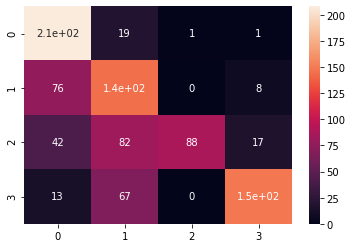

In [72]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

## Confusion matrix of ResNet50

In [78]:
img_list = []
from tensorflow.keras.applications.resnet50 import preprocess_input
for i in range(len(X_val)):
    img = np.expand_dims(X_val[i],axis=0)
    img = preprocess_input(img)
    img_list.append(img)

In [79]:
y_pred = []
for i in range(len(Y_val)):
    y = ResNet_model.predict(img_list[i])
    y_pred.append(y)

In [80]:
y_predict = []
for i in range(len(y_pred)):
    y_predict.append(np.argmax(y_pred[i]))

In [81]:
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(Y_val, y_predict)
print(cf_matrix)

[[188  23   7  11]
 [ 35 160  16  18]
 [  8  42 174   5]
 [  0  44   3 182]]


<AxesSubplot:>

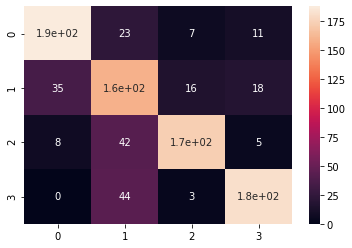

In [82]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

## Convert the models to TFLITE models

In [3]:
import tensorflow as tf
converter_obj = tf.lite.TFLiteConverter.from_keras_model(Obj_Det_model)
tflite_model_obj = converter_obj.convert()

#save the model
with open('object_model.tflite','wb')as f:
    f.write(tflite_model_obj)

INFO:tensorflow:Assets written to: /var/folders/v3/xl0c1pbj1dbb21s5p3v5f6sr0000gn/T/tmp_8kekk7_/assets


In [4]:
converter_Res = tf.lite.TFLiteConverter.from_keras_model(ResNet_model)
tflite_model_ResNet = converter_Res.convert()

#save the model
with open('ResNet_model.tflite','wb')as f:
    f.write(tflite_model_ResNet)

INFO:tensorflow:Assets written to: /var/folders/v3/xl0c1pbj1dbb21s5p3v5f6sr0000gn/T/tmpn6nxpr1j/assets


INFO:tensorflow:Assets written to: /var/folders/v3/xl0c1pbj1dbb21s5p3v5f6sr0000gn/T/tmpn6nxpr1j/assets
